In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
df=pd.read_csv("C:/Users/Balaji/Downloads/breast-cancer-wisconsin.data",names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])

In [10]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [11]:
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
le=LabelEncoder

In [13]:
x=df.iloc[:,0:5]
y=df['Class']

In [14]:
std_sc=StandardScaler()
x=std_sc.fit_transform(x)

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [16]:
kNN=KNeighborsClassifier(n_neighbors=5)
kNN.fit(x_train,y_train) 

KNeighborsClassifier()

In [17]:
print(kNN.score(x_test,y_test))

0.9476190476190476


In [18]:
y_pred = kNN.predict(x_test)

In [19]:
print(y_pred)

[4 4 2 2 4 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 4 2 4 2 2 4 2 4 4 2 4 4 2 4 2 2 2 4 2 2 4 4 2 2 2 4 2 2 2 4 2 2 2
 2 2 2 4 2 2 2 4 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2
 2 4 2 2 2 2 4 2 2 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 4 2 2 2 4 2 2 4 2 2 2 2
 2 2 2 2 2 4 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2
 4 2 4 4 4 2 4 2 2 4 2 4 2 2 2 4 4 2 2 2 4 2 2 4 2]


In [20]:
confusion_matrix(y_test,y_pred)

array([[136,   4],
       [  7,  63]], dtype=int64)

In [21]:
krange=range(1,10)

In [22]:
error1={} 
errorlist=[]

In [26]:
for k in krange: 
    knn=KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test)
    error1[k]=1-metrics.accuracy_score(y_test,y_pred) 
    errorlist.append(1-metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Error')

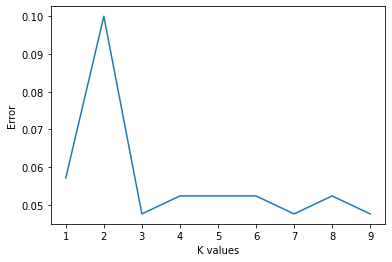

In [27]:
import matplotlib.pyplot as plt 
plt.plot(krange, errorlist)
plt.xlabel("K values")
plt.ylabel("Error")